In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
d = 3

In [3]:
T = 0

In [4]:
qc = QuantumCircuit()

In [5]:
code_qubit = QuantumRegister(d, 'code_qubit')
qc.add_register( code_qubit )

In [6]:
link_qubit = QuantumRegister(d-1, 'link_qubit')
qc.add_register( link_qubit )

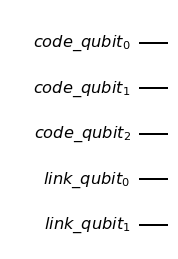

In [7]:
qc.draw(output='mpl')

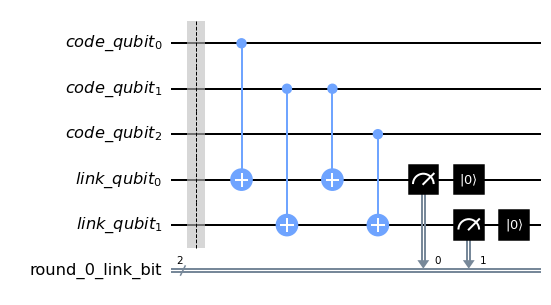

In [8]:
qc.barrier()

# for each link qubit, add a cx for the code qubit on one side
for j in range(d-1):
    qc.cx(code_qubit[j],link_qubit[j])
        
# and then one for the other side
for j in range(d-1):
    qc.cx(code_qubit[j+1],link_qubit[j])
    
# add a classical register to hold results from this round
link_bit = ClassicalRegister(d-1, 'round_'+str(T)+'_link_bit')
qc.add_register(link_bit)

# measure and then rest each link qubit to extract the syndrome
for j in range(d-1):
    qc.measure(link_qubit[j],link_bit[j])
    qc.reset(link_qubit[j])
        
# iterate the number of rounds
T += 1
    
qc.draw(output='mpl') # uncomment to draw circuit

In [9]:
T

1

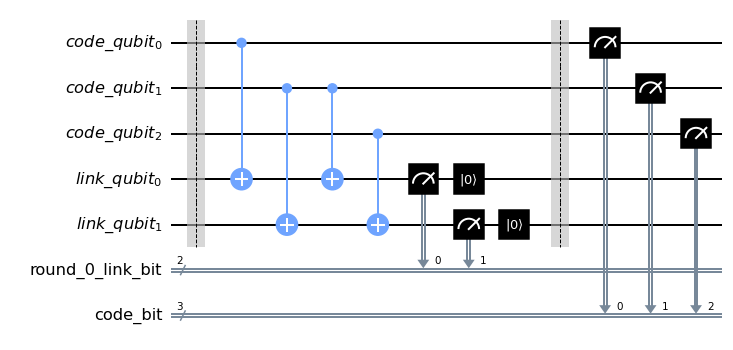

In [10]:
qc.barrier()

# add d bits for final readout of code qubits
code_bit = ClassicalRegister(d, 'code_bit')
qc.add_register(code_bit)

# measure code qubits
for j in range(d):
    qc.measure(code_qubit[j],code_bit[j])
    
qc.draw(output='mpl') # uncomment to draw circuit

In [11]:
from qiskit import Aer

backend_sim = Aer.get_backend('aer_simulator')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [12]:
job = backend_sim.run(qc)

In [13]:
result = job.result()

In [14]:
counts = result.get_counts()
counts

{'000 00': 1024}

In [15]:
examples_qasm = ['OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nx code_qubit[0];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nx code_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\nx code_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nx link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n', 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg code_qubit[3];\nqreg link_qubit[2];\ncreg round_0_link_bit[2];\ncreg round_1_link_bit[2];\ncreg code_bit[3];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nmeasure link_qubit[0] -> round_0_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_0_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\ncx code_qubit[0],link_qubit[0];\ncx code_qubit[1],link_qubit[1];\ncx code_qubit[1],link_qubit[0];\ncx code_qubit[2],link_qubit[1];\nx link_qubit[1];\nmeasure link_qubit[0] -> round_1_link_bit[0];\nreset link_qubit[0];\nmeasure link_qubit[1] -> round_1_link_bit[1];\nreset link_qubit[1];\nbarrier code_qubit[0],code_qubit[1],code_qubit[2],link_qubit[0],link_qubit[1];\nmeasure code_qubit[0] -> code_bit[0];\nmeasure code_qubit[1] -> code_bit[1];\nmeasure code_qubit[2] -> code_bit[2];\n']

examples = []
for qasm in examples_qasm:
    examples.append(QuantumCircuit.from_qasm_str(qasm))

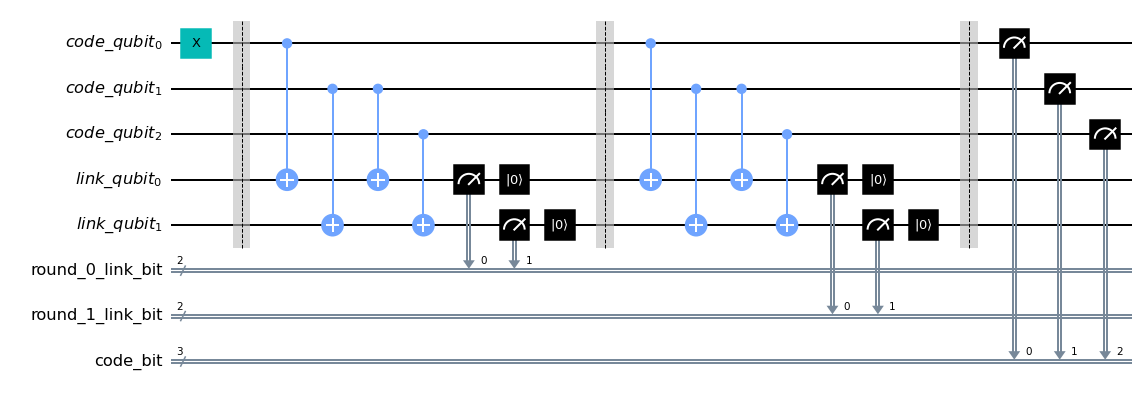

In [16]:
example = examples[0]
example.draw(output='mpl')

In [17]:
job = backend_sim.run(example)
counts = job.result().get_counts()
print(counts)

{'001 01 01': 1024}


In [18]:
def process_1(output):
    
    output = output.split(' ')
    logical = output[0][0]+' '+output[0][-1]

    final = ''
    for j in range(d-1):
        if output[0][j]==output[0][j+1]:
            final += '0'
        else:
            final += '1'
    output[0] = final     
    
    output = logical + '  ' + ' '.join(output)
    
    return output

output = list(counts.keys())[0]
process_1(output)

'0 1  01 01 01'

In [19]:
def process_2(output):
    
    output = output.split('  ')
    logical = output[0]
    syndrome = output[1].split(' ') [::-1]  
    
    changes = [syndrome[0]]
    for t in range(T):
        change = ''
        for j in range(d-1):
            if syndrome[t][j]==syndrome[t+1][j]:
                change += '0'
            else:
                change += '1'
        changes.append(change)
    
    output = logical + '  ' + ' '.join(changes[::-1])
    
    return output

process_2(process_1(output))

'0 1  00 01'

In [20]:
example = examples[0]

job = backend_sim.run(example)
counts = job.result().get_counts()

output = list(counts.keys())[0]
process_2(process_1(output))

'0 1  00 01'

In [21]:
!pip install git+https://github.com/NCCR-SPIN/topological_codes.git

  Cloning https://github.com/NCCR-SPIN/topological_codes.git to /tmp/pip-req-build-8h3x0c14
  Running command git clone -q https://github.com/NCCR-SPIN/topological_codes.git /tmp/pip-req-build-8h3x0c14


In [22]:
from topological_codes import RepetitionCode

In [23]:
d = 3
T = 2

code = RepetitionCode(d,T,resets=True)

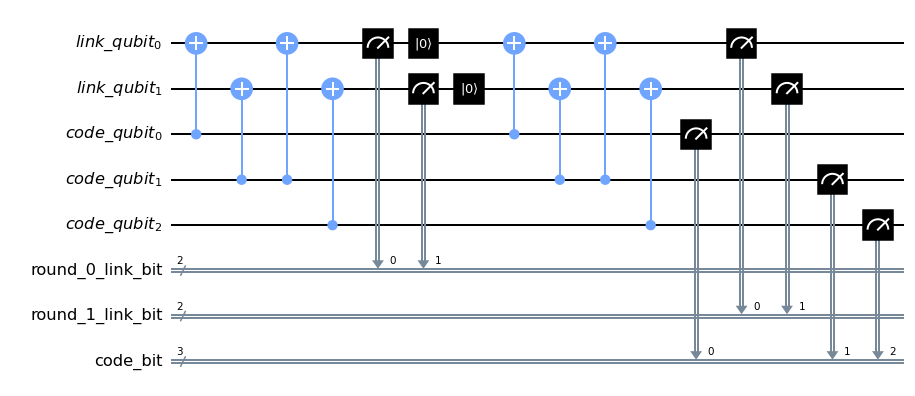

In [24]:
code.circuit['0'].draw(output='mpl')

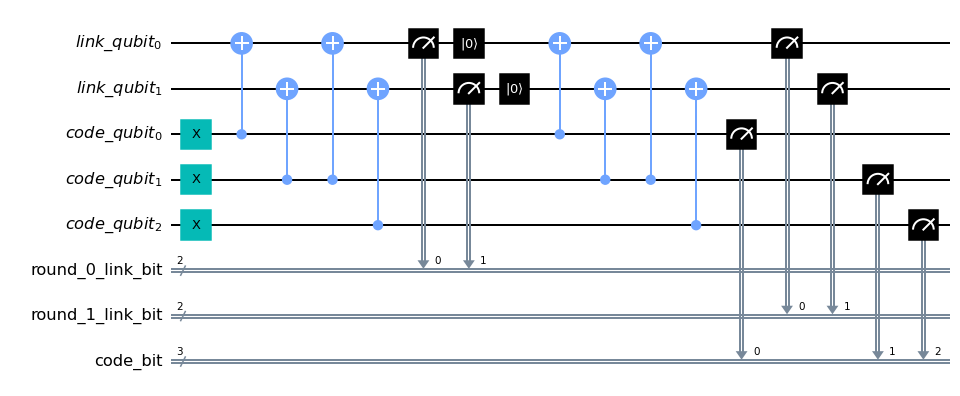

In [25]:
code.circuit['1'].draw(output='mpl')

In [26]:
job = backend_sim.run([code.circuit['0'], code.circuit['1']])

In [27]:
raw_results = {'0':job.result().get_counts(code.circuit['0']), '1':job.result().get_counts(code.circuit['1'])}
raw_results

{'0': {'000 00 00': 1024}, '1': {'111 00 00': 1024}}

In [28]:
results = code.process_results(raw_results)
results

{'0': {'0 0  00 00 00': 1024}, '1': {'1 1  00 00 00': 1024}}

In [29]:
from qiskit import IBMQ
provider = IBMQ.load_account()

In [30]:
backend = provider.get_backend('ibmq_manila')

In [31]:
import qiskit.tools.jupyter
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [32]:
from qiskit import transpile

transpiled_circuits = {
    bit:transpile(code.circuit[bit], backend=backend) for bit in ['0','1']
}

In [33]:
code.circuit['0'].count_ops()

OrderedDict([('cx', 8), ('measure', 7), ('reset', 2)])

In [34]:
transpiled_circuits['0'].count_ops()

OrderedDict([('cx', 8), ('measure', 7), ('reset', 2)])

In [35]:
code.circuit['0'].qubits

[Qubit(QuantumRegister(2, 'link_qubit'), 0),
 Qubit(QuantumRegister(2, 'link_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 0),
 Qubit(QuantumRegister(3, 'code_qubit'), 1),
 Qubit(QuantumRegister(3, 'code_qubit'), 2)]

In [36]:
initial_layout = [
    1,
    3,
    0,
    2,
    4
]

transpiled_circuits = {
    bit:transpile(code.circuit[bit], backend=backend, initial_layout=initial_layout) for bit in ['0','1']
}

transpiled_circuits['0'].count_ops()

OrderedDict([('cx', 8), ('measure', 7), ('reset', 2)])

In [37]:
job = backend.run([transpiled_circuits['0'], transpiled_circuits['1']], shots=8192)

In [38]:
job_id = job.job_id()
print(job_id)

6388f44bb29f0b63a9274d45


In [39]:
#job = backend.retrieve_job(job_id)

In [40]:
raw_results = {
    '0':job.result().get_counts(transpiled_circuits['0']),
    '1':job.result().get_counts(transpiled_circuits['1'])
}

#raw_results # uncomment to see results

In [41]:
results = code.process_results(raw_results)
#results # uncomment to see results

In [42]:
from topological_codes import GraphDecoder

decoder = GraphDecoder(code)

In [43]:
decoder.get_logical_prob(results)

{'0': 0.0045166015625, '1': 0.0830078125}

In [44]:
example_outputs = []

for example in examples:

    job = backend_sim.run(example)
    counts = job.result().get_counts()
    output = list(counts.keys())[0]
    processed_output = process_2(process_1(output))
    
    example_outputs.append(processed_output)
    
example_outputs

['0 1  00 00 01',
 '0 1  00 01 00',
 '0 1  01 00 00',
 '0 0  00 00 11',
 '0 0  00 11 00',
 '0 0  11 00 00',
 '0 0  00 10 01',
 '0 0  00 10 10',
 '0 0  10 10 00']

In [45]:
def get_ratios(results, logical='0'):
    
    probs = {}
    
    for output in example_outputs:
        if output in results[logical]:
            probs[output] = results[logical][output]/results[logical][example_outputs[0]]
        else:
            probs[output] = 0.0
            
    return probs
    
get_ratios(results)

{'0 1  00 00 01': 1.0,
 '0 1  00 01 00': 1.96,
 '0 1  01 00 00': 1.44,
 '0 0  00 00 11': 2.84,
 '0 0  00 11 00': 2.88,
 '0 0  11 00 00': 7.28,
 '0 0  00 10 01': 0.24,
 '0 0  00 10 10': 2.08,
 '0 0  10 10 00': 4.08}

In [46]:
code_no_resets = RepetitionCode(d,T,resets=False)

transpiled_circuits = {
    bit:transpile(code_no_resets.circuit[bit], backend=backend, initial_layout=initial_layout) for bit in ['0','1']
}

In [47]:
job = backend.run([transpiled_circuits['0'], transpiled_circuits['1']], shots=8192)

job.job_id()

'6388f8a8b29f0b0236274d4c'

In [48]:
raw_results_no_resets = {
    '0':job.result().get_counts(transpiled_circuits['0']),
    '1':job.result().get_counts(transpiled_circuits['1'])
}

results_no_resets = code_no_resets.process_results(raw_results_no_resets)

In [49]:
code_delay = RepetitionCode(d,T,resets=False,delay=1600)

transpiled_circuits = {
    bit:transpile(code_delay.circuit[bit], backend=backend, initial_layout=initial_layout) for bit in ['0','1']
}

In [50]:
job = backend.run([transpiled_circuits['0'], transpiled_circuits['1']], shots=8192)

job.job_id()

'6388fe159a6b25a7bab375cc'

In [51]:
#job = backend.retrieve_job(job_id)

raw_results_delay = {
    '0':job.result().get_counts(transpiled_circuits['0']),
    '1':job.result().get_counts(transpiled_circuits['1'])
}

results_delay = code.process_results(raw_results_delay)

In [52]:
print('Logical errors (resets):', GraphDecoder(code).get_logical_prob(results))
print('Logical errors (no resets):', GraphDecoder(code_no_resets).get_logical_prob(results_no_resets))
print('Logical errors (delay):', GraphDecoder(code_delay).get_logical_prob(results_delay))

Logical errors (resets): {'0': 0.0045166015625, '1': 0.0830078125}
Logical errors (no resets): {'0': 0.001220703125, '1': 0.052490234375}
Logical errors (delay): {'0': 0.0052439024390243906, '1': 0.06451219512195122}


In [53]:
for logical in ['0','1']:

    print('\nResults for encoded '+logical+'\n')
    
    probs = get_ratios(results,logical=logical)
    probs_no_resets = get_ratios(results_no_resets,logical=logical)
    probs_delay = get_ratios(results_delay,logical=logical)
    
    print('Processed output      resets no_resets delay')
    for output in example_outputs:
        print(output,'       ', round(probs[output],1),'  ',round(probs_no_resets[output],1),'     ',round(probs_delay[output],1))


Results for encoded 0

Processed output      resets no_resets delay
0 1  00 00 01         1.0    1.0       1.0
0 1  00 01 00         2.0    1.0       0.9
0 1  01 00 00         1.4    1.0       0.7
0 0  00 00 11         2.8    0.6       0.1
0 0  00 11 00         2.9    0.5       0.1
0 0  11 00 00         7.3    0.3       0.0
0 0  00 10 01         0.2    0.1       0.0
0 0  00 10 10         2.1    0.4       0.1
0 0  10 10 00         4.1    1.2       0.1

Results for encoded 1

Processed output      resets no_resets delay
0 1  00 00 01         1.0    1.0       1.0
0 1  00 01 00         9.8    6.0       3.1
0 1  01 00 00         1.8    0.0       0.0
0 0  00 00 11         4.4    3.9       1.9
0 0  00 11 00         9.0    8.7       4.4
0 0  11 00 00         0.0    0.0       0.0
0 0  00 10 01         7.0    12.6       4.5
0 0  00 10 10         0.4    0.6       0.6
0 0  10 10 00         0.1    0.0       0.0


In [54]:
decoder.get_error_probs(results)

{((1, 0, 1), (1, 1, 1)): 0.032806605874467765,
 ((1, 0, 0), (1, 1, 0)): 0.02471624932039601,
 ((1, 0, 0), (1, 0, 1)): 0.0402475087973348,
 ((1, 0, 1), (1, 1, 0)): 0.01955604774461428,
 ((1, 1, 1), (1, 2, 1)): 0.028702490539425807,
 ((1, 1, 0), (1, 2, 0)): 0.012847286303305505,
 ((1, 1, 0), (1, 1, 1)): 0.017994614865901704,
 ((1, 1, 1), (1, 2, 0)): 0.013564283191131232,
 ((1, 2, 0), (1, 2, 1)): 0.013809627781236511,
 ((1, 0, 1), (1, 0, 1)): 0.006140945469393866,
 ((1, 1, 1), (1, 1, 1)): -0.010290481825554032,
 ((1, 0, 0), (1, 0, 0)): 0.005043855008286857,
 ((1, 2, 1), (1, 2, 1)): 0.023737841514672564,
 ((1, 1, 0), (1, 1, 0)): -0.01637395356738991,
 ((1, 2, 0), (1, 2, 0)): 0.009305324698924311}

In [55]:
decoder._string2nodes('0 0  00 11 00')

Traceback (most recent call last):
  Input In [55] in <cell line: 1>
    decoder._string2nodes('0 0  00 11 00')
AttributeError: 'GraphDecoder' object has no attribute '_string2nodes'

Use %tb to get the full traceback.


In [ ]:
decoder._string2nodes('0 1  00 00 01')